#Import libraries

In [1]:
#!pip install datasets
#!pip install transformers
#!pip install pytorch_pretrained_bert

In [2]:
#!pip install gensim
#!pip install nltk
#!pip install spacy
#!pip install tensorflow
#!pip install scikit-learn
#!pip install seaborn
#!pip install wordcloud


In [1]:
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
import os
import re


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


import numpy as np

import datasets
from datasets import load_dataset
from datasets import DatasetDict, concatenate_datasets

import tensorflow as tf
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\njoki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\njoki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\njoki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data Loading and Cleaning

In [4]:
def load_text_data(folder_path):
    text_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                text_data.append(text)
    return text_data

# Replace 'folder_path' with the path to your folder containing documents
folder_path = 'C:/Users/njoki/OneDrive/Desktop/Capstone Project/CUAD_v1/full_contract_txt'
data = load_text_data(folder_path)

In [5]:
#length of the data
len(data)

510

In [6]:
data[1]

'EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENTIFIED BY [ * * * ] IS CONFIDENTIAL AND HAS BEEN EXCLUDED BECAUSE IT IS BOTH (I) NOT MATERIAL AND (II) WOULD LIKELY CAUSE COMPETITIVE HARM TO THE REGISTRANT IF PUBLICLY DISCLOSED. SERVICES AGREEMENT This Services Agreement (this "Agreement") is entered into on October 1, 2019 and is made effective as of November 1, 2019 (the "Effective Date"), by and between [ * * * ] (the "Provider"), and TELCOSTAR PTE, LTD., a company organized and existing under the laws of Singapore and Ability Computer & Software Industries Ltd, a company organized and existing under the laws of the State of Israel (each and both of them "Recipient"). Each of the foregoing parties is referred to herein as a "Party" and together as the "Parties". RECITALS A. Recipient wishes to engage the Provider to provide certain services and resources (the "Services") and Provider desires to provide Recipient with the Services all in accordance with the terms and conditions set fort

In [7]:
# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

def clean_text(text):

   # Remove newline characters
    text = re.sub(r'\n', '', text)
    
    # Remove patterns like (word)
    pattern = re.compile(r'\(\w\)')
    text = re.sub(pattern, '', text)
    
    # Remove all the special characters and digits
    text = re.sub("[^a-zA-Z0-9\s.]", "", text)

    # Remove single characters
    #text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Make text lower case
    #text = text.lower()

    # Remove stop words
    text = ' '.join([word for word in text.split() if word.lower() not in stopwords.words('english')])

                    
    # Substituting multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove float numbers
    float_pattern = re.compile(r'\b\d+\.\d+\b|\b\d+\b')
    text = re.sub(float_pattern, '', text)

    return text


In [9]:
# usage:
#'data' is a list of strings
cleaned_data = [clean_text(text) for text in data]


In [10]:
dataset = cleaned_data

In [11]:
#save the cleaned data
import pickle

with open('cleaned_data.pkl', 'wb') as file:
    pickle.dump(cleaned_data, file)


In [5]:
import pickle

with open('C:/Users/njoki/OneDrive/Desktop/Capstone Project/cleaned_data.pkl', 'rb') as file:
     dataset = pickle.load(file)




In [6]:
#sample of a cleaned data
dataset[1]

'EXHIBIT  INFORMATION EXHIBIT IDENTIFIED CONFIDENTIAL EXCLUDED MATERIAL II WOULD LIKELY CAUSE COMPETITIVE HARM REGISTRANT PUBLICLY DISCLOSED. SERVICES AGREEMENT Services Agreement Agreement entered October   made effective November   Effective Date Provider TELCOSTAR PTE LTD. company organized existing laws Singapore Ability Computer Software Industries Ltd company organized existing laws State Israel Recipient. foregoing parties referred herein Party together Parties. RECITALS A. Recipient wishes engage Provider provide certain services resources Services Provider desires provide Recipient Services accordance terms conditions set forth herein. AGREEMENT Parties hereby agree follows . Services.  Provision Services. Provider agrees provide Services set forth Exhibit attached hereto Exhibit may amended supplemented pursuant terms Agreement Exhibit Recipient respective periods terms conditions set forth Agreement Exhibit. Notwithstanding contents Exhibit Provider agrees respond good faith

**Length Distribution**

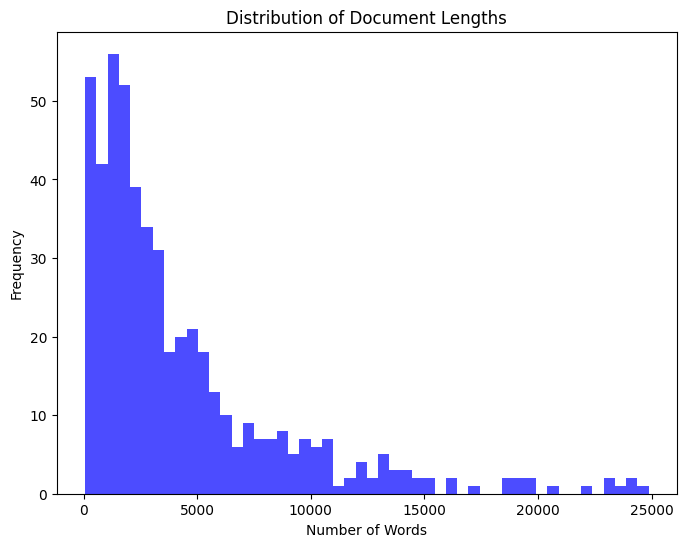

In [14]:
#  Document Length Distribution
import seaborn as sns
import matplotlib.pyplot as plt

def document_length(text):
    return len(text.split())


# Assuming 'loaded_data' is a list of text data
document_lengths = [len(text.split()) for text in dataset]

# Plot the distribution of document lengths for train_data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(document_lengths, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Document Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()





**WordCloud**


A word cloud is a cluster of words represented in different sizes.The bigger and bolder the word appears, the more often it is mentioned within a given text data,and more important it is.


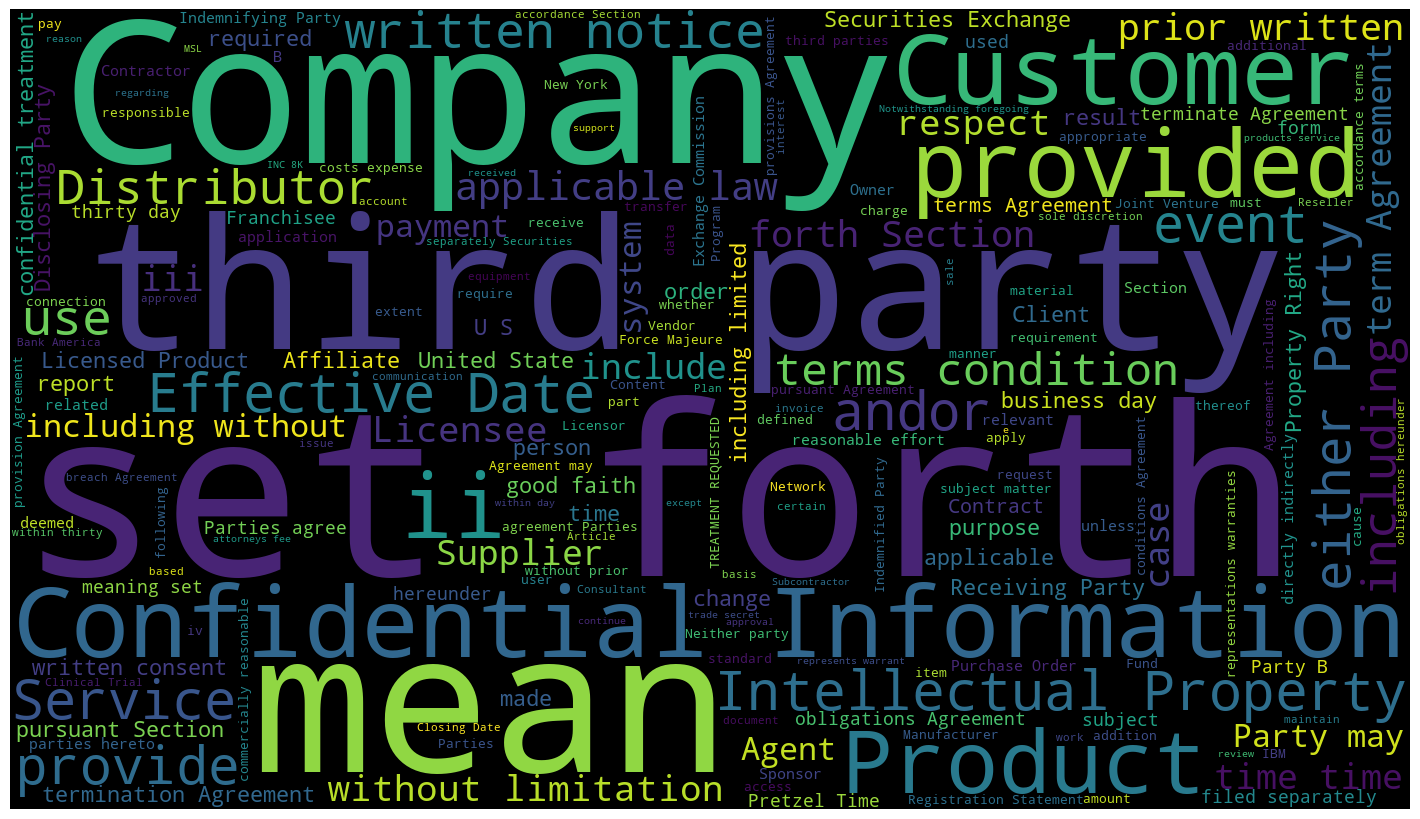

In [15]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(article for article in dataset)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 1400, height = 800,
                      #backgroud_color = 'white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(text)

plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**Extracting Important Keywords from Text with TF-IDF**

Creating the IDF

In [16]:
from sklearn.model_selection import train_test_split
#split dataset
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Print or use the resulting sets
print("Training set:", len(train_data))
print("Testing set:", len(test_data))


Training set: 408
Testing set: 102


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
#Countvectorizer to create a vocabulary and generate Word counts
#create  word's vocabulary

cv=CountVectorizer(max_df=0.95, #ignore words that appear in 95% of documents
                   stop_words='english',
                   max_features=10000,
                  ngram_range=(1,3))
word_count_vector=cv.fit_transform(train_data)

In [18]:
#shape of the word count vector
word_count_vector.shape

(408, 10000)

In [19]:
#get 20 words from the vocabulary
list(cv.vocabulary_.keys())[:20]

['exhibit',
 'manufacturing',
 'outsourcing',
 'agreementthis',
 'entered',
 'january',
 'nice',
 'systems',
 'registered',
 'corporation',
 'place',
 'business',
 'street',
 'israel',
 'industrial',
 'zone',
 'box',
 'contractor',
 'collectively',
 'referred']

**Tfidf Transformer to Compute Inverse Document Frequency (IDF)**

We are essentially taking the sparse matrix from CountVectorizer to generate the IDF when you invoke fit.

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize the TF-IDF Transformer
#fit the word count vector
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(word_count_vector)


TfidfTransformer()

In [21]:
#some idf values
tfidf_transformer.idf_

array([6.32056798, 5.91510287, 3.83566133, ..., 6.32056798, 6.32056798,
       4.01798288])

Computing TF-IDF and Extracting Keywords

In [22]:
#sort the values in the vector
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn(feature_names, sorted_items, topn=20):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [23]:
#compute the tf-idf value
feature_names=cv.get_feature_names_out() #get the feature names

# get the document that we want to extract keywords from
doc=train_data[0] 

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn(feature_names,sorted_items,20)

# now print the results
print("\n=====Text=====")
print(test_data[0])
print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])


=====Text=====
Exhibit  NONCOMPETITION AGREEMENT AMENDMENT NO.  NONCOMPETITION AGREEMENT AMENDMENT NO.  Amendment entered August   VIVINT SOLAR INC. Delaware corporation together successors permitted assigns Vivint Solar VIVINT INC. Utah corporation together successors permitted assigns Vivint. Vivint Solar Vivint may also referred herein individually Party collectively Parties. RECITALSWHEREAS Vivint Solar Vivint affiliate business entities common control ownership  Acquisition LLC Delaware limited liability company.WHEREAS Parties entered NonCompetition Agreement dated September   Parties collectively NonCompetition Agreement set certain restrictive covenants Party.WHEREAS Parties wish amend existing obligations NonCompetition Agreement.WHEREAS Parties also desire extend term nonsolicitation obligations NonCompetition Agreement.AGREEMENTNOW THEREFORE consideration mutual covenants agreements conditions set forth herein good valuable consideration receipt sufficiency hereby acknowled

**Generate keywords for a batch of test documents**

In [24]:
import pandas as pd
#generate tf-idf for all documents in the test list. test_data has 102 documents
tf_idf_vector=tfidf_transformer.transform(cv.transform(test_data))

results=[]
for i in range(tf_idf_vector.shape[0]):
    
    # get vector for a single document
    curr_vector=tf_idf_vector[i]
    
    #sort the tf-idf vector by descending order of scores
    sorted_items=sort_coo(curr_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn(feature_names,sorted_items,10)
    
    
    results.append(keywords)

df=pd.DataFrame(zip(train_data,results),columns=['test_data','keywords'])
df

,test_data,keywords
0,EXHIBIT MANUFACTURING OUTSOURCING AGREEMENTTh...,"{'noncompetition': 0.747, 'master': 0.195, 'ag..."
1,Exhibit ENDORSEMENT AGREEMENT ENDORSEMENT AGR...,"{'initial': 0.339, 'zone': 0.298, 'substitute'..."
2,Exhibit SHBV HONG KONG LTD. WASTE2ENERGY GROU...,"{'work order': 0.504, 'sponsor': 0.325, 'prefe..."
3,Exhibit Certain confidential information cont...,"{'gp': 0.469, 'john': 0.433, 'holdings': 0.399..."
4,Table ContentsExhibit .28SERVICE AGREEMENT1 OC...,"{'seller': 0.331, 'buyer': 0.283, 'sellers': 0..."
...,...,...
97,Exhibit .23Rise Education GroupSERVICE AGREEME...,"{'company': 0.318, 'deliverables': 0.272, 'par..."
98,EXHIBIT B Exhibit B entered 26th day March Ku...,"{'developer': 0.679, 'franchisor': 0.514, 'res..."
99,EXHIBIT MediaLinx File No. COBRANDING CONTEN...,"{'pcq': 0.278, 'abw': 0.278, 'cobranding': 0.2..."
100,Exhibit .26STRATEGIC ALLIANCE AGREEMENTThis ST...,"{'management committee': 0.456, 'terminal': 0...."


**Named Entity Recognition (NER)**

Named Entity Recognition is a subtask of NLP that focuses on identifying and classifying entities within textual data. These entities encompass a diverse range of information, including names of individuals, organizations, locations, dates, numerical values, and more. NER equips machines with the ability to extract these entities, making it an important tool for different applications across  industries.

**Using pre-trained Bert Model**

In [7]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
model_name = "dslim/bert-base-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)



tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

C:\Users\njoki\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\njoki\.cache\huggingface\hub\models--dslim--bert-base-NER. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#create a pipeline
ner_pipeline = pipeline("ner",model=model,tokenizer=tokenizer, aggregation_strategy="simple")

ner_results = ner_pipeline(dataset)
print(ner_results[:10])

**Gradio Web App for Bert NER**

In [36]:
from transformers import pipeline

import gradio as gr

data = dataset

def ner(text):
    output = ner_pipeline(text)
    return {"text": text, "entities": output}    

ner_app = gr.Interface(ner,
                      gr.Textbox(placeholder="Enter text here..."),
                      gr.HighlightedText(),
                      examples=["Njoki iis lovely","Njoki iis lovely"],
                      live=True)

ner_app.launch(share=True)


Running on local URL:  http://127.0.0.1:7864
Running on public URL: https://440ffc7fac2e22a864.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Using spaCy pipelines**

In [ ]:
# Download the 'en_core_web_sm' model
spacy.cli.download('en_core_web_sm')
                   
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Define a function to perform NER on a text
def perform_ner(text_series):
    named_entities = []
    for text in text_series:
        doc = nlp(text)
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        named_entities.extend(entities)
    return named_entities

# Apply NER to a  dataset
named_entities = perform_ner(dataset)


In [ ]:
# Display the named entities and their labels
def display_named_entities(named_entities):
    for entity, label in named_entities:
        print(f"Entity: {entity}, Label: {label}")

# Display named entities 
print("Named entities in data:")

entities=display_named_entities(named_entities)


In [29]:
#you can check what type a particular entity is with the method below
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [30]:
#spaCy also provides an interesting visual to see named entities directly in the text
from spacy import displacy
displacy.render(nlp(dataset[1]),style="ent",jupyter=True)

**Gradio Web App for Spacy NER**

In [1]:
import gradio as gr
import os
os.system('python -m spacy download en_core_web_sm')
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

def text_analysis(text):
    doc = nlp(text)
    html = displacy.render(doc, style="dep", page=True)
    html = (
        "<div style='max-width:100%; max-height:360px; overflow:auto; color:blue'>"
        + html
        + "</div>"
    )
    pos_count = {
        "char_count": len(text),
        "token_count": 0,
    }
    pos_tokens = []

    for token in doc:
        pos_tokens.extend([(token.text, token.pos_), (" ", None)])

    return pos_tokens, pos_count, html

ner_app2 = gr.Interface(
    text_analysis,
    gr.Textbox(placeholder="Enter sentence here..."),
    ["highlight", "json", "html"],
    examples=dataset
)

ner_app2.launch(share=True)


NameError: name 'dataset' is not defined